# PhysiCell 2021 Virtual Workshop and Hackathon
## Session 2: PhysiCell First Dive
* Refresher: Sample and Template Projects 
* Refresher: Project Structure
* Cells, Phenotype, and Cell Defintions
* Learn about general modeling workflow
  * Basic 	(Sessions 1, 2)
  * Intermediate 	(Session 5)
  * Full 	(Sessions 6-12)
* Populate, build, and run a basic model (Basic Workflow)
* Load and visualize data in Python

### Code Section 1

In [1]:
#  add Python-loader repo to the path 
import sys
sys.path.insert(0, '../Python-loader/')
from pyMCDS import pyMCDS

import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Type pyMCDS. and hit the tab key to see methods 

!ls ./output/*.xml 

./output/final.xml	     ./output/output00000018.xml
./output/initial.xml	     ./output/output00000019.xml
./output/output00000000.xml  ./output/output00000020.xml
./output/output00000001.xml  ./output/output00000021.xml
./output/output00000002.xml  ./output/output00000022.xml
./output/output00000003.xml  ./output/output00000023.xml
./output/output00000004.xml  ./output/output00000024.xml
./output/output00000005.xml  ./output/output00000025.xml
./output/output00000006.xml  ./output/output00000026.xml
./output/output00000007.xml  ./output/output00000027.xml
./output/output00000008.xml  ./output/output00000028.xml
./output/output00000009.xml  ./output/output00000029.xml
./output/output00000010.xml  ./output/output00000030.xml
./output/output00000011.xml  ./output/output00000031.xml
./output/output00000012.xml  ./output/output00000032.xml
./output/output00000013.xml  ./output/output00000033.xml
./output/output00000014.xml  ./output/output00000034.xml
./output/output00000015.xml  ./output/o

### Code Section 2

In [3]:
mcds = pyMCDS('output00000000.xml', 'output')

Reading output/output00000000.xml
Reading output/initial_mesh0.mat
Reading output/output00000000_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000000_cells.mat


In [4]:
print(mcds.get_time())  # what simulation time is saved here? 
print(mcds.get_cell_variables()) # what data are saved in the cells? 
print(mcds.get_substrate_names())  # what diffusing substrates? 

0.0
['ID', 'position_x', 'position_y', 'position_z', 'total_volume', 'cell_type', 'cycle_model', 'current_phase', 'elapsed_time_in_phase', 'nuclear_volume', 'cytoplasmic_volume', 'fluid_fraction', 'calcified_fraction', 'orientation_x', 'orientation_y', 'orientation_z', 'polarity', 'velocity_x', 'velocity_y', 'velocity_z', 'pressure', 'number_of_nuclei', 'damage', 'total_attack_time', 'contact_with_basement_membrane', 'current_cycle_phase_exit_rate', 'dead', 'current_death_model', 'death_rates_0', 'death_rates_1', 'cytoplasmic_biomass_change_rate', 'nuclear_biomass_change_rate', 'fluid_change_rate', 'calcification_rate', 'target_solid_cytoplasmic', 'target_solid_nuclear', 'target_fluid_fraction', 'radius', 'nuclear_radius', 'surface_area', 'cell_cell_adhesion_strength', 'cell_BM_adhesion_strength', 'cell_cell_repulsion_strength', 'cell_BM_repulsion_strength', 'cell_adhesion_affinities', 'relative_maximum_adhesion_distance', 'maximum_number_of_attachments', 'attachment_elastic_constant',

In [5]:
mcds.data.keys()

dict_keys(['metadata', 'mesh', 'continuum_variables', 'discrete_cells'])

### Code Section 3

In [6]:
np.mean( mcds.data['discrete_cells']['oncoprotein'] )

1.778537662441421

(array([458., 111.,  96.,  68.,  65.,  49.,  18.,  13.,   6.,   5.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

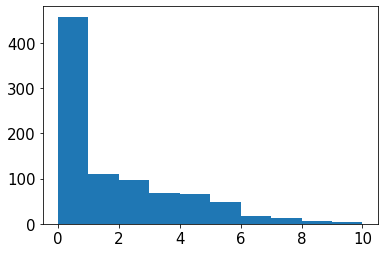

In [10]:
import matplotlib 

# %matplotlib qt 

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

plt.hist( mcds.data['discrete_cells']['oncoprotein'] )


### Code Section 4

In [11]:
cx = mcds.data['discrete_cells']['position_x']
cy = mcds.data['discrete_cells']['position_y']
op = mcds.data['discrete_cells']['oncoprotein']

(-250.0, 250.0, -250.0, 250.0)

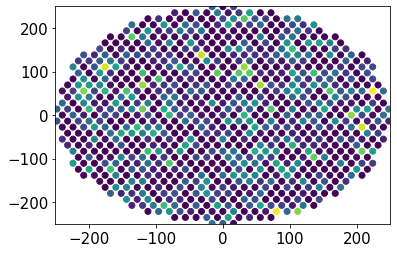

In [12]:
plt.clf()
plt.scatter(cx,cy,c=op)
plt.axis([-250,250,-250,250])

### Code Section 5

Text(0, 0.5, 'y')

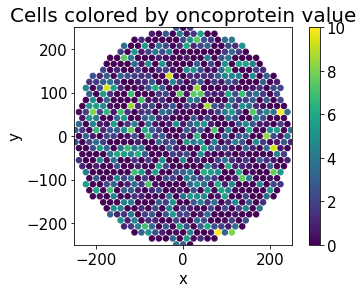

In [13]:
plt.clf()
plt.scatter( cx , cy, c=op, s=30 )

plt.axis( 'image' )
plt.axis( [-250,250,-250,250] )

plt.colorbar()

plt.title( 'Cells colored by oncoprotein value' , size=20)
plt.xlabel( 'x' , size=15 ) 
plt.ylabel( 'y', size=15 )

### Code Section 6

Reading output/output00000006.xml
Reading output/initial_mesh0.mat
Reading output/output00000006_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000006_cells.mat


Text(0.5, 1.0, 'oncoprotein at t=6.0 hours')

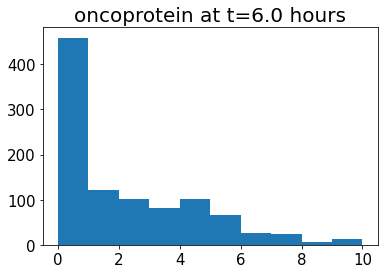

In [14]:
mcds = pyMCDS('output00000006.xml', 'output')
t=mcds.get_time()
cx = mcds.data['discrete_cells']['position_x']
cy = mcds.data['discrete_cells']['position_y']
op = mcds.data['discrete_cells']['oncoprotein']
plt.clf()
plt.hist( op ) 
plt.title( 'oncoprotein at t=' + \
str(t/60) + ' hours' , size=20)

### Code Section 7 

In [29]:
print(str(mcds.data.keys()))
cycle = mcds.data['discrete_cells']['cycle_model']
cycle = cycle.astype( int ) 

live = np.argwhere( cycle < 100 ).flatten()
dead = np.argwhere( cycle >= 100 ).flatten()

print( len( live) )
print( len(dead) )

dict_keys(['metadata', 'mesh', 'continuum_variables', 'discrete_cells'])
489
0


### Code Section 8

972
25
2.1183566648689647


Text(0.5, 1.0, 'Live cells colored by p at t=6.0 hr')

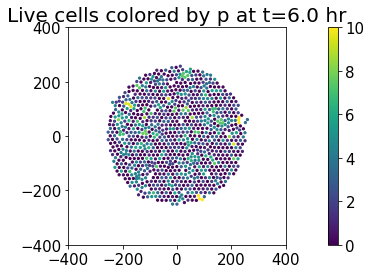

In [16]:
# Live and dead cell counts
n_live = len( live ); print( n_live) 
n_dead = len( dead ); print( n_dead ); 

# Mean oncoprotein in live cells only 
print( np.mean( op[live] ) )


# Let's scatter plot of only live cells  
plt.clf()
plt.scatter( cx[live],cy[live],c=op[live],s=5); 
plt.colorbar()
plt.axis('image')
plt.axis([-400,400,-400,400])
plt.title( 'Live cells colored by p at t=' +str(t/60) + ' hr',size=20)

### Code Section 8a

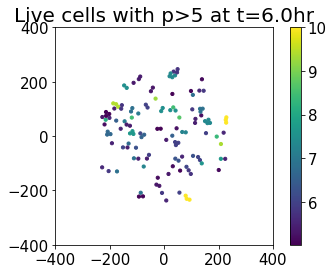

In [17]:
ind = np.argwhere( (cycle<100) & (op>5) ) .flatten()
plt.clf()
plt.scatter( cx[ind], cy[ind], c=op[ind], s=10 )
plt.title( 'Live cells with p>5 at t='\
+str(t/60) + 'hr', size=20)
plt.axis('image')
plt.axis([-400,400,-400,400])
plt.colorbar()

### Code Section 9 

In [18]:
plt.clf()
print( mcds.get_substrate_names() ); 

['oxygen']


<Figure size 432x288 with 0 Axes>

(-490.0, 490.0, -490.0, 490.0)

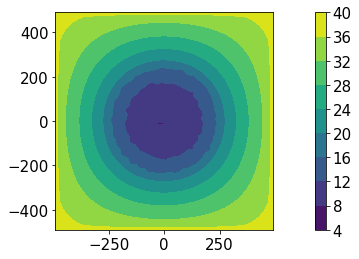

In [19]:
o2 = mcds.get_concentrations( 'oxygen' );
X,Y = mcds.get_2D_mesh(); 

plt.clf()
plt.contourf(X,Y,o2[:,:,0]);
plt.colorbar()
plt.axis('image')

### Code Section 10 

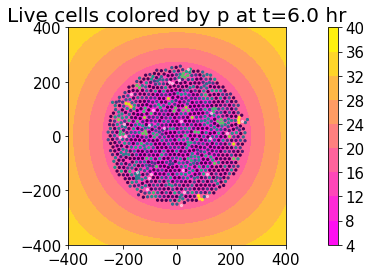

In [20]:
circle_size = 5

plt.clf()
mcds.get_substrate_names(); 

o2 = mcds.get_concentrations( 'oxygen' );
X,Y = mcds.get_2D_mesh(); 
plt.contourf(X,Y,o2[:,:,0],cmap='spring');
plt.colorbar()

plt.scatter( cx[live],cy[live],c=op[live],s=circle_size); 
plt.axis('image')
plt.axis([-400,400,-400,400])
plt.title( 'Live cells colored by p at t=' +str(t/60) + ' hr', size=20)

# let's plot dead cells as white and transparent
plt.scatter( cx[dead],cy[dead],c='w',s=circle_size, alpha=0.5 ); 

### Code Section 11

In [21]:
# Let's get live and dead cell counts, mean p (in live cells). We need to loop overall simulation times 

last_index = 6;
live_count = np.zeros( last_index+1 ); 
dead_count = np.zeros( last_index+1 );
mean_p = np.zeros( last_index+1 );
std_p = np.zeros( last_index+1 );
times = np.zeros( last_index+1 ); 
for n in range( 0,last_index+1 ):
	filename='output'+"%08i"%n+'.xml'
	mcds=pyMCDS(filename,'output')
	times[n]= mcds.get_time()
	cycle=mcds.data['discrete_cells']['cycle_model']
	p = mcds.data['discrete_cells']['oncoprotein']
	live = np.argwhere(cycle<100).flatten()
	dead = np.argwhere(cycle>=100).flatten()
	live_count[n] = len(live)
	dead_count[n] = len(dead)
	mean_p[n] = np.mean( p[live] )
	std_p[n] = np.std( p[live] )


Reading output/output00000000.xml
Reading output/initial_mesh0.mat
Reading output/output00000000_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000000_cells.mat
Reading output/output00000001.xml
Reading output/initial_mesh0.mat
Reading output/output00000001_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000001_cells.mat
Reading output/output00000002.xml
Reading output/initial_mesh0.mat
Reading output/output00000002_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000002_cells.mat
Reading output/output00000003.xml
Reading output/initial_mesh0.mat
Reading output/output00000003_microenvironment0.mat
Parsing oxygen data
working on discrete cell data...

Reading output/output00000003_cells.mat
Reading output/output00000004.xml
Reading output/initial_mesh0.mat
Reading output/output00000004_microenvironment0.mat
Parsing oxygen data
working o

### Code Section 12

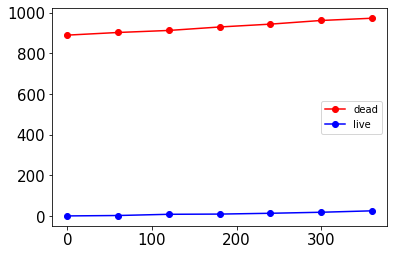

In [22]:
plt.clf()
plt.plot( times, live_count , 'r-o' )
plt.plot( times, dead_count , 'b-o' ); 
plt.legend( {'live', 'dead' } ) 

In [23]:
poly=np.polyfit( times,np.log(live_count),1) 
print( poly[0] )
# growth rate is 0th element
# in units of 1/min 
# 0.0003373436446715521

0.000254715343579792


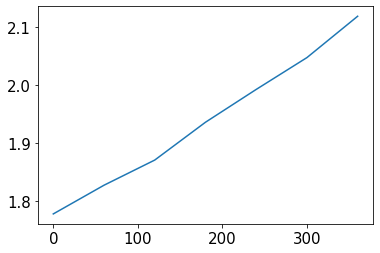

In [24]:
plt.clf()
plt.plot(times,mean_p);
# mean increases rapidly 
# due to selection processes


### Code Section 13

In [25]:
n = 3
filename='output'+"%08i"%n+'.xml'
mcds=pyMCDS(filename,'output')
t = mcds.get_time()
cell_type=mcds.data['discrete_cells']['cell_type']
cell_type=cell_type.astype(int)

ind1 = np.argwhere(cell_type==1).flatten(); # director 
ind2 = np.argwhere(cell_type==2).flatten(); # cargo 
ind3 = np.argwhere(cell_type==3).flatten(); # worker 

cx = mcds.data['discrete_cells']['position_x']
cy = mcds.data['discrete_cells']['position_y']

Reading output/output00000003.xml
Reading output/initial_mesh0.mat
Reading output/output00000003_microenvironment0.mat
Parsing director signal data
Parsing cargo signal data
working on discrete cell data...

Reading output/output00000003_cells.mat


### Code Section 14

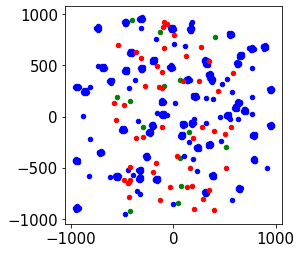

In [26]:
circle_size=20

plt.clf()
# plt.figure(figsize=(15,15))
plt.scatter(cx[ind1],cy[ind1],c='g',s=circle_size) 
plt.scatter(cx[ind2],cy[ind2],c='b',s=circle_size) 
plt.scatter(cx[ind3],cy[ind3],c='r',s=circle_size) 
plt.axis('square');

### Code Section 15

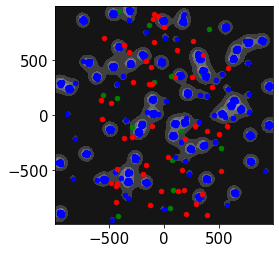

In [27]:
mcds.get_substrate_names(); 

cs = mcds.get_concentrations( 'cargo signal' );
X,Y = mcds.get_2D_mesh(); 

plt.clf()
# plt.figure(figsize=(15,15))
plt.contourf(X,Y,cs[:,:,0],cmap='gray');

plt.scatter(cx[ind1],cy[ind1],c='g',s=circle_size) 
plt.scatter(cx[ind2],cy[ind2],c='b',s=circle_size) 
plt.scatter(cx[ind3],cy[ind3],c='r',s=circle_size) 
plt.axis('square');